In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Allows the use of display() for DataFrames
from IPython.display import display


In [34]:
#Import supplementary visualizations code visuals.py
import visuals as vs

In [9]:

# Load the dataset
in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

# Print the first few entries of the RMS Titanic data
display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Store the 'Survived' feature in a new variable and remove it from the dataset
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis = 1)

# Show the new dataset with 'Survived' removed
display(data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### early prediction

I think first class stood a better survival chance, as well as women and children.  I predict PassengerId 1 and 3 to have survived.

In [12]:
def accuracy_score(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        
        # Calculate and return the accuracy as a percent
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "ERROR: Number of predictions does not match number of outcomes!"
    

In [22]:
# Test the 'accuracy_score' function
predictions = pd.Series(np.ones(5, dtype = int))

accuracy_score(outcomes[:5], predictions)

'Predictions have an accuracy of 60.00%.'

# Making Predictions

In [41]:
def predictions_0(data):
    """ Model with no features. Always predicts a passenger did not survive. """

    predictions = []
    for _, passenger in data.iterrows():
        
        # Predict the survival of 'passenger'
        predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_0(data)

### Question 1¶

Using the RMS Titanic data, how accurate would a prediction be that none of the passengers survived?

In [42]:
accuracy_score(outcomes, predictions)

'Predictions have an accuracy of 61.62%.'

In [43]:
# Alternate calculation

1 - sum(outcomes)/len(outcomes)

0.61616161616161613

#### ANSWER to Question 1

A zero survival prediction would be 61% correct.

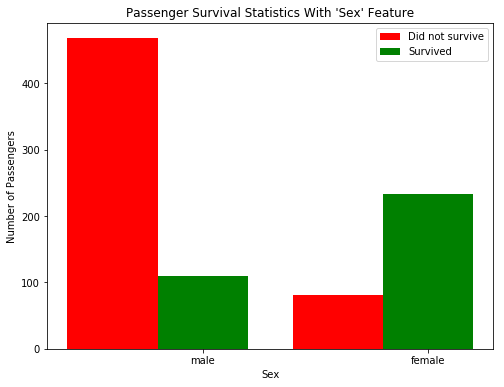

In [35]:
vs.survival_stats(data, outcomes, 'Sex')

### Question 2

How accurate would a prediction be that all female passengers survived and the remaining passengers did not survive?

In [44]:
def predictions_1(data):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        if passenger['Sex']=='male':

            predictions.append(0)
            
        elif passenger['Sex']=='female':
            
            predictions.append(1)
            
        else:
            
            return "ERROR: non-binary value found in Titanic passenger sex"
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_1(data)

In [45]:
accuracy_score(outcomes, predictions)

'Predictions have an accuracy of 78.68%.'

#### ANSWER to Question 2:

Accuracy increased from 61.6% to 78.7%

## Second Degree of Model Improvement

Additional feature. For example, consider all of the male passengers aboard the RMS Titanic: Can we find a subset of those passengers that had a higher rate of survival? Let's start by looking at the Age of each male, by again using the survival_stats function. This time, we'll use a fourth parameter (into the vs.survival_stats function) to filter out the data so that only passengers with the Sex 'male' will be included.


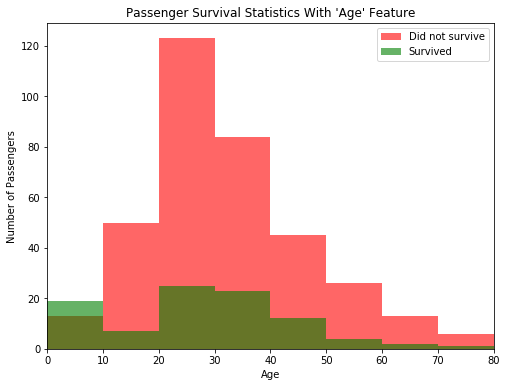

In [47]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

In [49]:
def predictions_2(data):
    """ Model with two features: 
            - Predict a passenger survived if they are female. 
            - Predict a passenger survived if they are male and under 10 years old."""
    
    predictions = []
    for _, passenger in data.iterrows():
        
        if passenger['Sex']=='male':
            
            if passenger['Age']<=10:
            
                predictions.append(1)
                
            else:
            
                predictions.append(0)
            
        elif passenger['Sex']=='female':
            
            predictions.append(1)
            
        else:
            
            return "ERROR: non-binary value found in Titanic passenger sex"
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_2(data)

In [50]:
accuracy_score(outcomes, predictions)

'Predictions have an accuracy of 79.24%.'

# Objective: Attain an accuracy of 80%. 

Pclass, Sex, Age, SibSp, and Parch are some suggested features to try.

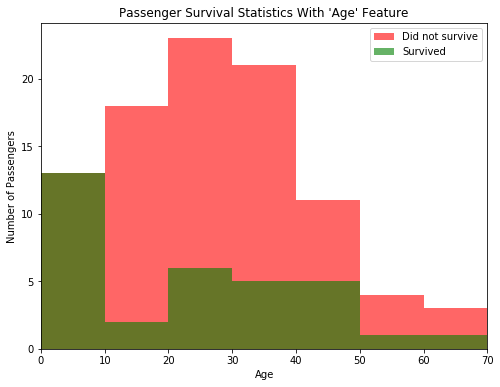

In [70]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'", "SibSp > 0"])

#### Decision: no improvement

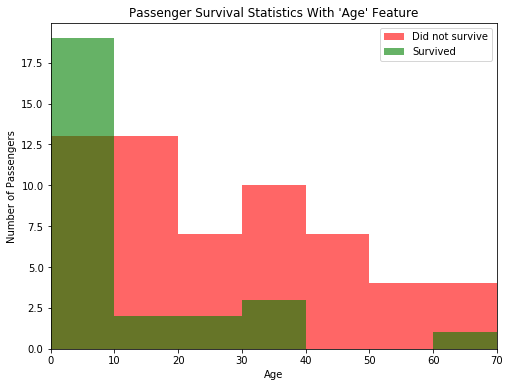

In [119]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'", "Parch > 0"])

#### Decision: no improvement

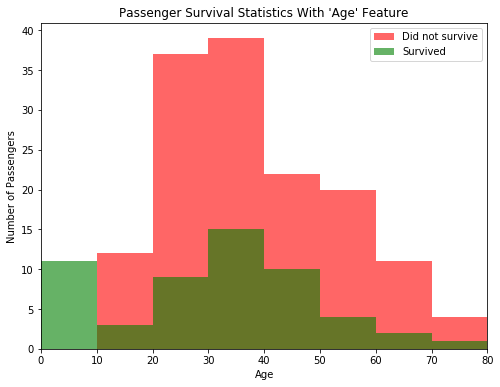

In [121]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'", "Pclass < 3"])

In [81]:
def predictions_3(data):
    """ Model with three features: 
            - Predict a passenger survived if they are female. 
            - Predict a passenger survived if they are male, 
                under 10 years old, AND in first or second class."""
    
    predictions = []
    for _, passenger in data.iterrows():
        
        if passenger['Sex']=='male':
            
            if passenger['Age']<=10 and passenger['Pclass']<3:
            
                predictions.append(1)
                
            else:
            
                predictions.append(0)
            
        elif passenger['Sex']=='female':
            
            predictions.append(1)
            
        else:
            
            return "ERROR: non-binary value found in Titanic passenger sex"
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_3(data)

In [82]:
accuracy_score(outcomes, predictions)

'Predictions have an accuracy of 79.91%.'

#### Almost!

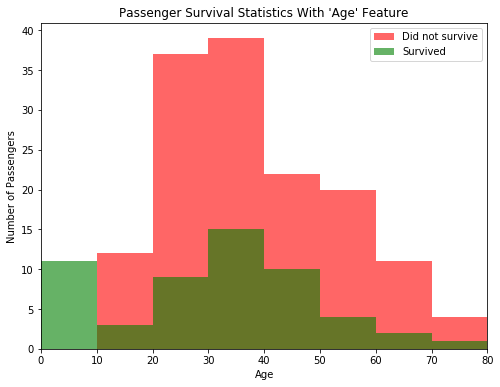

In [110]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'", "Pclass < 3"])

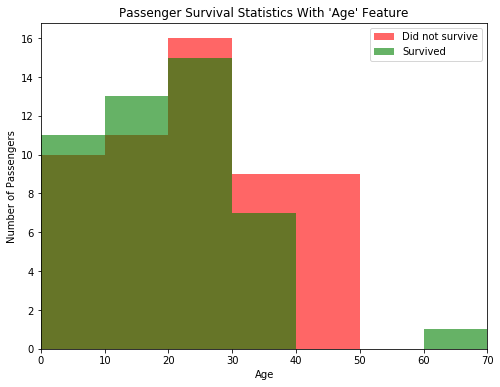

In [114]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'female'", "Pclass == 3"])

In [117]:
def predictions_3(data):
    """ Model with three features: 
            Predict a passenger survived if they are in first or second class, AND:
                - female, and under 20 or over 60 years old.
                - male, and under 10 years old."""
    
    predictions = []
    for _, passenger in data.iterrows():        
        
        if passenger['Sex']=='male':
            if passenger['Pclass']<3 and passenger['Age']<10:
                predictions.append(1)
            else:
                predictions.append(0)

        elif passenger['Sex']=='female':
            if passenger['Pclass']==3 and 20<passenger['Age']<60:
                predictions.append(0)
            else:
                predictions.append(1)
        else:
            return "ERROR: non-binary value found in Titanic passenger sex"
        
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_3(data)

In [118]:
accuracy_score(outcomes, predictions)

'Predictions have an accuracy of 81.03%.'

### successfully met objective

The first exploration I made was into whether having a sibling or spouse had any bearing on survival.  By plotting a visual, this seemed to have no positive contribution.

Next was the effect of whether a passenger had a parent or child, and this plotted effect seemed relatively negligible as well.

Next was class.  While most males below 10 survived, the plot showed that all second and first class males absolutely survived.  This improved the model slightly, yet not to 80%.

It was then necessary to examine first and second class female survival rates.  By including this level of granularity, the model accuracy was improved beyond 80%.

## Question 5

Think of a real-world scenario where supervised learning could be applied. What would be the outcome variable that you are trying to predict? Name two features about the data used in this scenario that might be helpful for making the predictions.

Supervised learning can be applied to commercial airfare to predict a ticket price given basic features such as airport cities, day of year, and time of day; in addition to airline company, meteorological forecasts, crude oil price forecasts, and more.